<a href="https://colab.research.google.com/github/DAPablo99/PythonProjects/blob/main/Company_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt

drive.mount('/content/drive')
file_path_countries = '/content/drive/MyDrive/hw_da/final_project_python/countries.csv'
file_path_events = '/content/drive/MyDrive/hw_da/final_project_python/events.csv'
file_path_products = '/content/drive/MyDrive/hw_da/final_project_python/products.csv'

dc = pd.read_csv(file_path_countries, sep=",")
dc.head()

Mounted at /content/drive


,name,alpha-2,alpha-3,region,sub-region
0,Afghanistan,AF,AFG,Asia,Southern Asia
1,Åland Islands,AX,ALA,Europe,Northern Europe
2,Albania,AL,ALB,Europe,Southern Europe
3,Algeria,DZ,DZA,Africa,Northern Africa
4,American Samoa,AS,ASM,Oceania,Polynesia


In [ ]:
dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        249 non-null    object
 1   alpha-2     248 non-null    object
 2   alpha-3     249 non-null    object
 3   region      248 non-null    object
 4   sub-region  248 non-null    object
dtypes: object(5)
memory usage: 9.9+ KB


In [ ]:
dc["region"] = dc["region"].fillna("Antarctica")
dc["sub-region"] = dc["sub-region"].fillna("Antarctica")
dc[dc["alpha-2"].isna()]
dc["alpha-2"] = dc["alpha-2"].fillna("NA")
dc["alpha-3"] = dc["alpha-3"].fillna("NAM")

After performing these transformations, each column contains 249 non-zero values. Data cleaning was performed by replacing missing values ​​in the region and sub-region columns with "Antarctica", and in alpha-2 and alpha-3 with the conditional codes "NA" and "NAM", respectively, which allows to avoid errors in further processing.

The table contains information about countries and territories, including the following columns: name (the country's name), alpha-2 (the two-letter ISO country code), alpha-3 (the three-letter ISO country code), region (the continent or major geographical region), and sub-region (a more specific geographical area within the region). Each row represents a different country or territory with these associated attributes.

In [ ]:
de = pd.read_csv(file_path_events, sep=",")
de.tail()

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost
1325,994504153,1/10/2017,1/13/2017,M,SWE,4594,Online,4734.0,9.33,6.92
1326,994978797,12/5/2014,1/2/2015,H,ITA,1270,Offline,5192.0,47.45,31.79
1327,996754205,9/20/2010,9/22/2010,L,RUS,7331,Offline,574.0,255.28,159.42
1328,998043382,6/15/2010,7/3/2010,H,MLT,8293,Online,2070.0,437.20,263.33
1329,999879729,3/31/2012,5/6/2012,M,ALB,7940,Offline,5486.0,668.27,502.54


In [ ]:
de.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        1330 non-null   int64  
 1   Order Date      1330 non-null   object 
 2   Ship Date       1330 non-null   object 
 3   Order Priority  1330 non-null   object 
 4   Country Code    1248 non-null   object 
 5   Product ID      1330 non-null   int64  
 6   Sales Channel   1330 non-null   object 
 7   Units Sold      1328 non-null   float64
 8   Unit Price      1330 non-null   float64
 9   Unit Cost       1330 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 104.0+ KB


In [ ]:
de[de["Country Code"].isna()]
de.dropna(subset=["Country Code"], inplace=True)

In [ ]:
de[de["Units Sold"].isna()]
de.dropna(subset=["Units Sold"], inplace=True)

In [ ]:
de["Order Date"] = pd.to_datetime(de["Order Date"])
de["Ship Date"] = pd.to_datetime(de["Ship Date"])

After performing these transformations, each column contains 1246 non-zero values. We chose to delete all rows where 'Country Code' or 'Units Sold' had a NaN value, as it could cause problems in future analysis.The Order Date and Ship Date columns have been converted to the datetime data type


The table contains order data with the following columns: Order ID (unique identifier for each order), Order Date (date the order was placed), Ship Date (date the order was shipped), Order Priority (priority level of the order), Country Code (country associated with the order), Product ID (unique identifier for the product), Sales Channel (indicating whether the sale was online or offline), Units Sold (number of units sold), Unit Price (price per unit), and Unit Cost (cost per unit). Each row represents an individual order with these attributes.


In [ ]:
dp = pd.read_csv(file_path_products, sep=",")
dp.head(20)

,id,item_type
0,2103,Cereal
1,7940,Household
2,2455,Clothes
3,1270,Beverages
4,8681,Office Supplies
5,4594,Fruits
6,5988,Vegetables
7,7331,Baby Food
8,8875,Meat
9,8293,Cosmetics


In [ ]:
dp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         12 non-null     int64 
 1   item_type  12 non-null     object
dtypes: int64(1), object(1)
memory usage: 324.0+ bytes


The table contains a list of product categories with two columns: id (a unique identifier for each product type) and item_type (the name of the product category). Each row represents a different item type, such as Cereal, Household, or Beverages. After checking for missing or zero values, it was confirmed that the table contains no NaN or zero entries, so no data cleaning or transformations are required.

In [ ]:
merged_events_countries = pd.merge(de, dc, how="left", left_on="Country Code", right_on="alpha-3")
merged_events_countries.head()

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost,name,alpha-2,alpha-3,region,sub-region
0,100640618,2014-10-08,2014-10-18,M,NOR,2103,Online,650.0,205.70,117.11,Norway,NO,NOR,Europe,Northern Europe
1,100983083,2016-08-11,2016-08-11,C,SRB,2103,Offline,1993.0,205.70,117.11,Serbia,RS,SRB,Europe,Southern Europe
2,102230632,2017-05-13,2017-06-13,L,MNE,2455,Online,1171.0,109.28,35.84,Montenegro,ME,MNE,Europe,Southern Europe
3,103435266,2012-08-11,2012-09-18,H,SRB,1270,Offline,7648.0,47.45,31.79,Serbia,RS,SRB,Europe,Southern Europe
4,103450715,2015-03-15,2015-04-18,H,SVK,8681,Online,2220.0,651.21,524.96,Slovakia,SK,SVK,Europe,Eastern Europe


In [ ]:
merged_events_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246 entries, 0 to 1245
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        1246 non-null   int64         
 1   Order Date      1246 non-null   datetime64[ns]
 2   Ship Date       1246 non-null   datetime64[ns]
 3   Order Priority  1246 non-null   object        
 4   Country Code    1246 non-null   object        
 5   Product ID      1246 non-null   int64         
 6   Sales Channel   1246 non-null   object        
 7   Units Sold      1246 non-null   float64       
 8   Unit Price      1246 non-null   float64       
 9   Unit Cost       1246 non-null   float64       
 10  name            1246 non-null   object        
 11  alpha-2         1246 non-null   object        
 12  alpha-3         1246 non-null   object        
 13  region          1246 non-null   object        
 14  sub-region      1246 non-null   object        
dtypes: d

In [ ]:
df = pd.merge(merged_events_countries,dp, how="left", left_on="Product ID", right_on="id")
df.head()

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost,name,alpha-2,alpha-3,region,sub-region,id,item_type
0,100640618,2014-10-08,2014-10-18,M,NOR,2103,Online,650.0,205.70,117.11,Norway,NO,NOR,Europe,Northern Europe,2103,Cereal
1,100983083,2016-08-11,2016-08-11,C,SRB,2103,Offline,1993.0,205.70,117.11,Serbia,RS,SRB,Europe,Southern Europe,2103,Cereal
2,102230632,2017-05-13,2017-06-13,L,MNE,2455,Online,1171.0,109.28,35.84,Montenegro,ME,MNE,Europe,Southern Europe,2455,Clothes
3,103435266,2012-08-11,2012-09-18,H,SRB,1270,Offline,7648.0,47.45,31.79,Serbia,RS,SRB,Europe,Southern Europe,1270,Beverages
4,103450715,2015-03-15,2015-04-18,H,SVK,8681,Online,2220.0,651.21,524.96,Slovakia,SK,SVK,Europe,Eastern Europe,8681,Office Supplies


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246 entries, 0 to 1245
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        1246 non-null   int64         
 1   Order Date      1246 non-null   datetime64[ns]
 2   Ship Date       1246 non-null   datetime64[ns]
 3   Order Priority  1246 non-null   object        
 4   Country Code    1246 non-null   object        
 5   Product ID      1246 non-null   int64         
 6   Sales Channel   1246 non-null   object        
 7   Units Sold      1246 non-null   float64       
 8   Unit Price      1246 non-null   float64       
 9   Unit Cost       1246 non-null   float64       
 10  name            1246 non-null   object        
 11  alpha-2         1246 non-null   object        
 12  alpha-3         1246 non-null   object        
 13  region          1246 non-null   object        
 14  sub-region      1246 non-null   object        
 15  id  

We can delete the columns alpha-2, alpha-3, and id because this information is already present in the merged DataFrame and is no longer needed after the join operations.

In [ ]:
df.drop(["alpha-2", "alpha-3", "id"], axis=1, inplace=True)

In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246 entries, 0 to 1245
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        1246 non-null   int64         
 1   Order Date      1246 non-null   datetime64[ns]
 2   Ship Date       1246 non-null   datetime64[ns]
 3   Order Priority  1246 non-null   object        
 4   Country Code    1246 non-null   object        
 5   Product ID      1246 non-null   int64         
 6   Sales Channel   1246 non-null   object        
 7   Units Sold      1246 non-null   float64       
 8   Unit Price      1246 non-null   float64       
 9   Unit Cost       1246 non-null   float64       
 10  name            1246 non-null   object        
 11  region          1246 non-null   object        
 12  sub-region      1246 non-null   object        
 13  item_type       1246 non-null   object        
dtypes: datetime64[ns](2), float64(3), int64(2), object(7)
me

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost,name,region,sub-region,item_type
0,100640618,2014-10-08,2014-10-18,M,NOR,2103,Online,650.0,205.70,117.11,Norway,Europe,Northern Europe,Cereal
1,100983083,2016-08-11,2016-08-11,C,SRB,2103,Offline,1993.0,205.70,117.11,Serbia,Europe,Southern Europe,Cereal
2,102230632,2017-05-13,2017-06-13,L,MNE,2455,Online,1171.0,109.28,35.84,Montenegro,Europe,Southern Europe,Clothes
3,103435266,2012-08-11,2012-09-18,H,SRB,1270,Offline,7648.0,47.45,31.79,Serbia,Europe,Southern Europe,Beverages
4,103450715,2015-03-15,2015-04-18,H,SVK,8681,Online,2220.0,651.21,524.96,Slovakia,Europe,Eastern Europe,Office Supplies


In [ ]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ","_")
df["profit"] = (df["units_sold"]*(df["unit_price"] -df["unit_cost"]))
df["revenue"] = (df["units_sold"]*df["unit_price"])
df["cost"] = (df["units_sold"]*df["unit_cost"])
df.head()

,order_id,order_date,ship_date,order_priority,country_code,product_id,sales_channel,units_sold,unit_price,unit_cost,name,region,sub-region,item_type,profit,revenue,cost
0,100640618,2014-10-08,2014-10-18,M,NOR,2103,Online,650.0,205.70,117.11,Norway,Europe,Northern Europe,Cereal,57583.50,133705.00,76121.50
1,100983083,2016-08-11,2016-08-11,C,SRB,2103,Offline,1993.0,205.70,117.11,Serbia,Europe,Southern Europe,Cereal,176559.87,409960.10,233400.23
2,102230632,2017-05-13,2017-06-13,L,MNE,2455,Online,1171.0,109.28,35.84,Montenegro,Europe,Southern Europe,Clothes,85998.24,127966.88,41968.64
3,103435266,2012-08-11,2012-09-18,H,SRB,1270,Offline,7648.0,47.45,31.79,Serbia,Europe,Southern Europe,Beverages,119767.68,362897.60,243129.92
4,103450715,2015-03-15,2015-04-18,H,SVK,8681,Online,2220.0,651.21,524.96,Slovakia,Europe,Eastern Europe,Office Supplies,280275.00,1445686.20,1165411.20


Let's start with the company's key performance metrics: total number of orders, total profit, total number of countries covered

In [ ]:
total_number_of_orders = df["order_id"].value_counts().sum()
print(f"Total number 0f orders:\t\t{total_number_of_orders}")
total_profit = (df["units_sold"]*df["unit_price"]).sum()
print(f"Total profit:\t\t{total_profit}$")
total_countries_covered = df["name"].nunique()
print(f"Countries covered:\t\t{total_countries_covered}")

Total number 0f orders:		1246
Total profit:		1598983761.26$
Countries covered:		45


In [ ]:
df.rename(columns={"item_type": "category"}, inplace=True)

We will analyze sales (revenue, expenses, profits, product popularity) and create appropriate visualizations by:
product categories;
geography (countries, regions);
sales channels (online or offline).

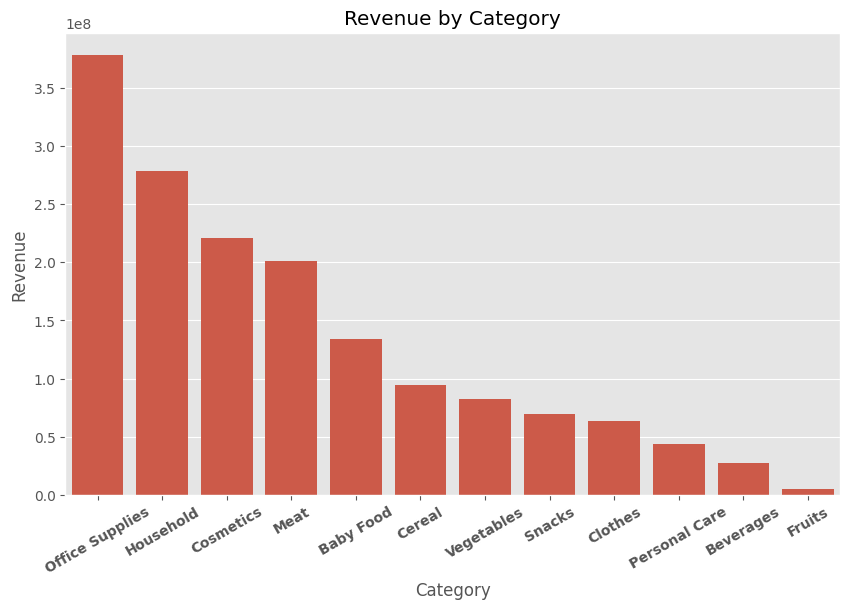

In [ ]:
df_sorted_revenue = df.groupby("category")["revenue"].sum().reset_index().sort_values(by="revenue", ascending=False)
plt.figure(figsize=(10, 6))
plt.style.use("ggplot")
sns.barplot(data = df_sorted_revenue, x="category", y="revenue",estimator="sum")
plt.xticks(rotation=30,fontweight='bold')
plt.xlabel("Category")
plt.ylabel("Revenue")
plt.title("Revenue by Category")
plt.show()

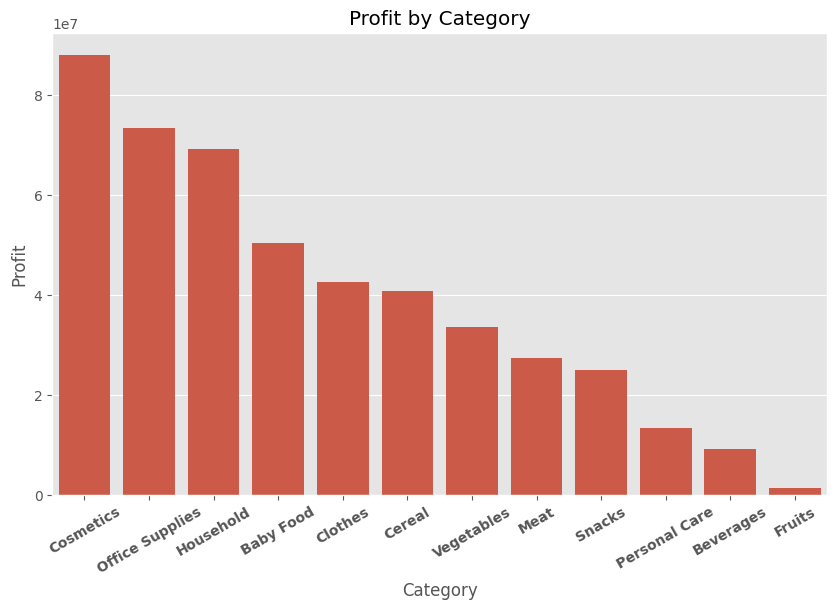

In [ ]:
df_sorted_profit = df.groupby("category")["profit"].sum().reset_index().sort_values(by="profit", ascending=False)
plt.figure(figsize=(10, 6))
plt.style.use("ggplot")
sns.barplot(data = df_sorted_profit, x="category", y="profit",estimator="sum")
plt.xticks(rotation=30,fontweight='bold')
plt.xlabel("Category")
plt.ylabel("Profit")
plt.title("Profit by Category")
plt.show()

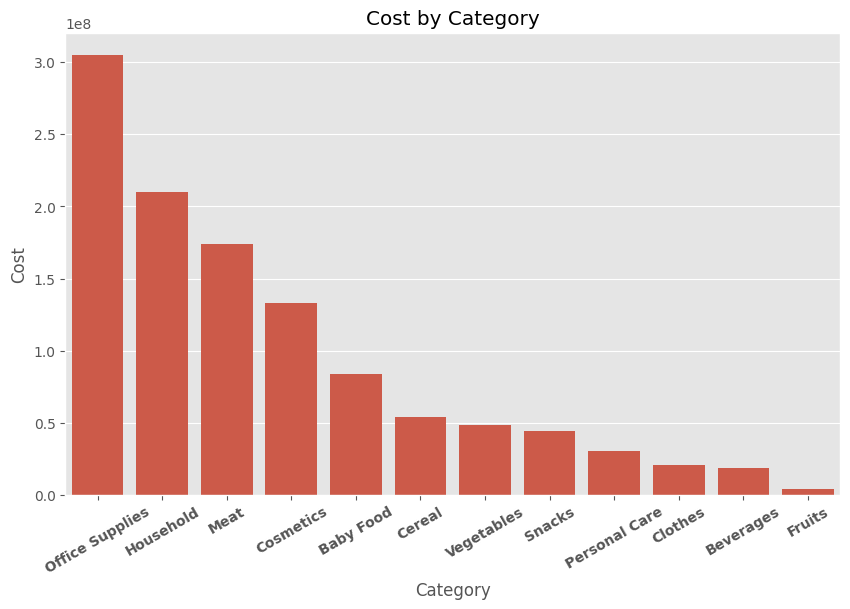

In [ ]:
df_sorted_cost = df.groupby("category")["cost"].sum().reset_index().sort_values(by="cost", ascending=False)
plt.figure(figsize=(10, 6))
plt.style.use("ggplot")
sns.barplot(data = df_sorted_cost, x="category", y="cost",estimator="sum")
plt.xticks(rotation=30,fontweight='bold')
plt.xlabel("Category")
plt.ylabel("Cost")
plt.title("Cost by Category")
plt.show()

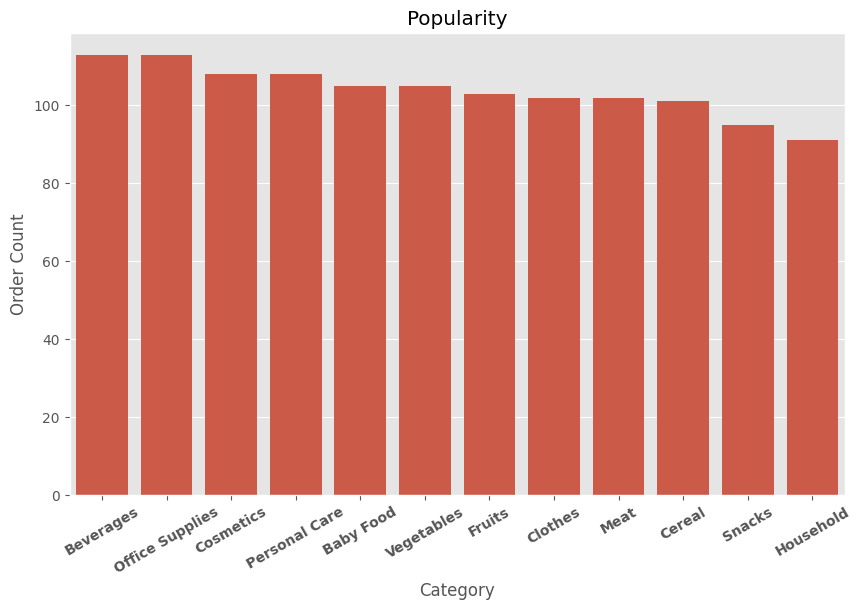

In [ ]:
df_sorted_popularity = df.groupby("category")["order_id"].size().reset_index(name="order_count").sort_values(by="order_count", ascending=False)
plt.figure(figsize=(10, 6))
plt.style.use("ggplot")
sns.barplot(data = df_sorted_popularity, x="category", y="order_count")
plt.xticks(rotation=30,fontweight='bold')
plt.xlabel("Category")
plt.ylabel("Order Count")
plt.title("Popularity")
plt.show()

<ipython-input-24-dcec929c96c4>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0, 0].set_xticklabels(ax[0, 0].get_xticklabels(), rotation=50, fontweight='bold')
<ipython-input-24-dcec929c96c4>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0, 1].set_xticklabels(ax[0, 1].get_xticklabels(), rotation=50, fontweight='bold')
<ipython-input-24-dcec929c96c4>:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1, 0].set_xticklabels(ax[1, 0].get_xticklabels(), rotation=50, fontweight='bold')
<ipython-input-24-dcec929c96c4>:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1, 1].set_xticklabels(ax[1, 1].get_xticklabels(), rotation=50, fontweight='bol

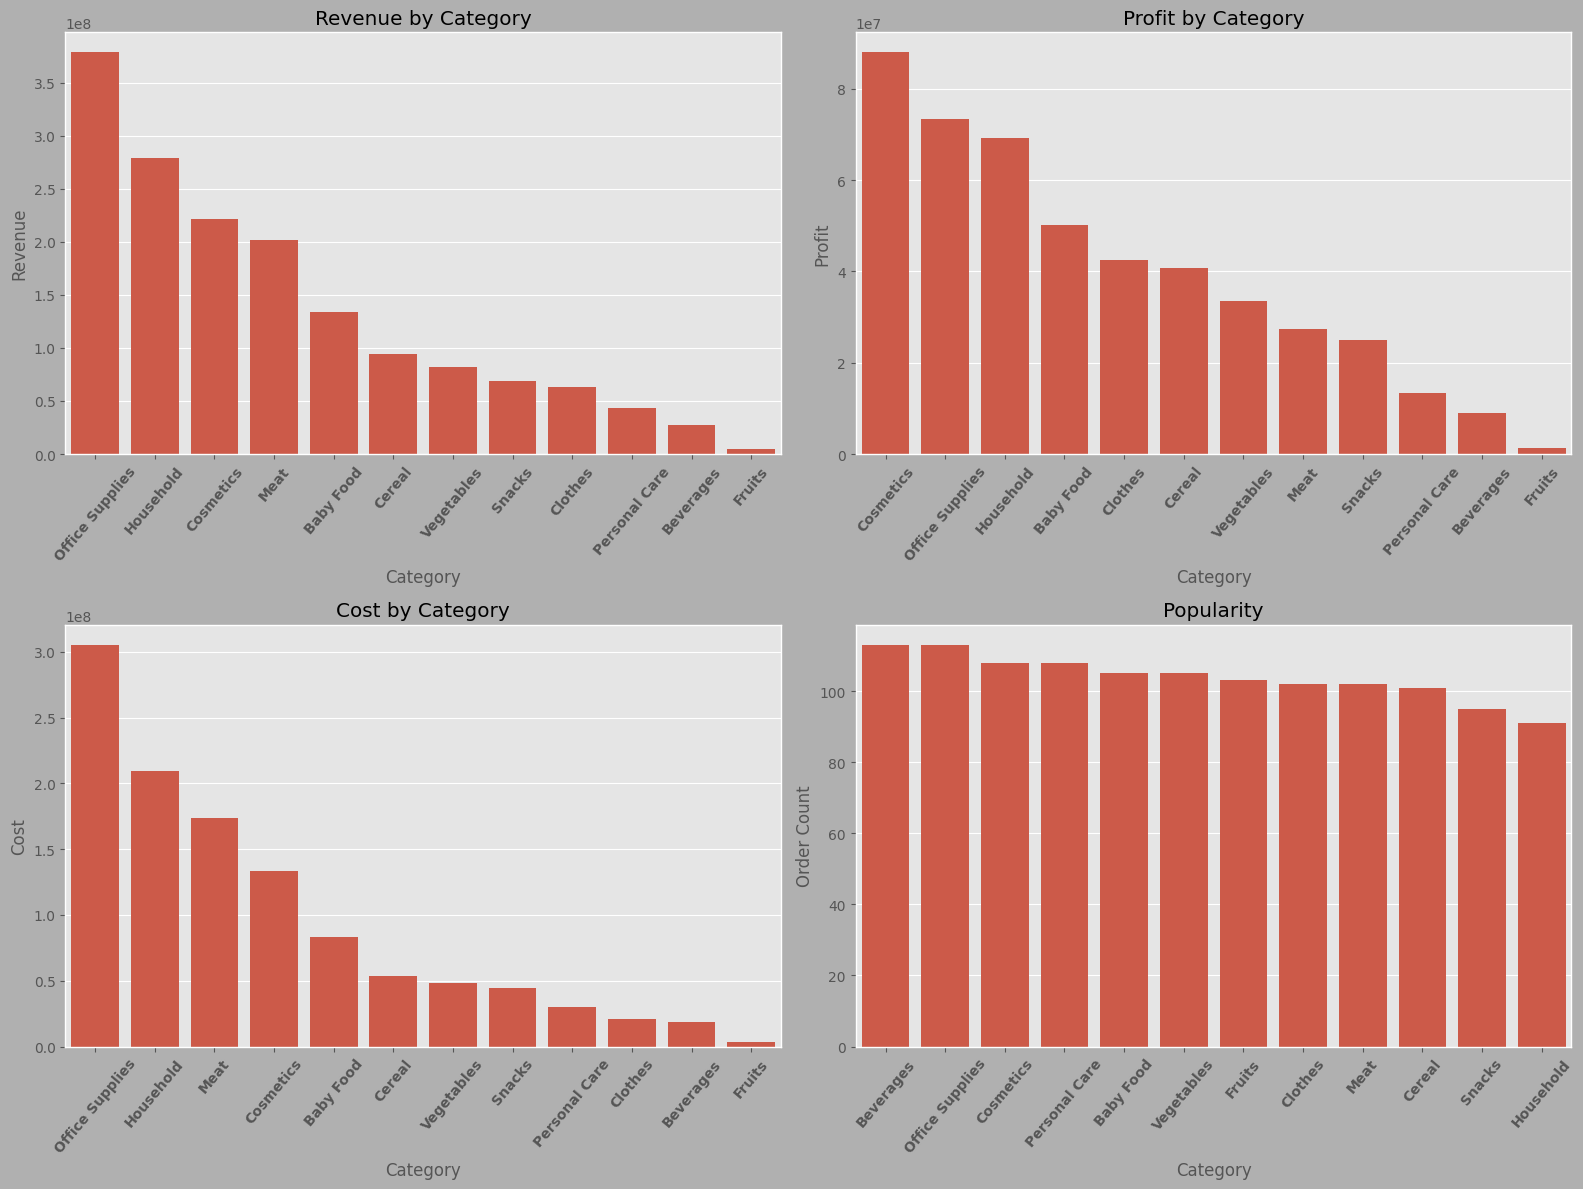

In [ ]:

fig, ax = plt.subplots(2, 2, figsize=(16, 12))
plt.style.use("ggplot")
fig.patch.set_facecolor("#b0b0b0")


sns.barplot(data=df_sorted_revenue, x="category", y="revenue", ax=ax[0, 0], estimator="sum")
ax[0, 0].set_xlabel("Category")
ax[0, 0].set_ylabel("Revenue")
ax[0, 0].set_title("Revenue by Category")
ax[0, 0].set_xticklabels(ax[0, 0].get_xticklabels(), rotation=50, fontweight='bold')


sns.barplot(data=df_sorted_profit, x="category", y="profit", ax=ax[0, 1], estimator="sum")
ax[0, 1].set_xlabel("Category")
ax[0, 1].set_ylabel("Profit")
ax[0, 1].set_title("Profit by Category")
ax[0, 1].set_xticklabels(ax[0, 1].get_xticklabels(), rotation=50, fontweight='bold')


sns.barplot(data=df_sorted_cost, x="category", y="cost", ax=ax[1, 0], estimator="sum")
ax[1, 0].set_xlabel("Category")
ax[1, 0].set_ylabel("Cost")
ax[1, 0].set_title("Cost by Category")
ax[1, 0].set_xticklabels(ax[1, 0].get_xticklabels(), rotation=50, fontweight='bold')


sns.barplot(data=df_sorted_popularity, x="category", y="order_count", ax=ax[1, 1])
ax[1, 1].set_xlabel("Category")
ax[1, 1].set_ylabel("Order Count")
ax[1, 1].set_title("Popularity")
ax[1, 1].set_xticklabels(ax[1, 1].get_xticklabels(), rotation=50, fontweight='bold')

plt.tight_layout()
plt.show()


The Cosmetics category is the best in terms of profit and profitability. Office Supplies has the highest turnover, which indicates high demand and sales volumes. The Beverages and Fruits categories generate the lowest profit, which indicates the need to optimize costs or review their promotion strategy on the one hand, on the other hand, these categories are quite popular, but do not bring much income in themselves

<ipython-input-28-2448f42032ea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_fifteen_countries_revenue, x="name", y="revenue", palette="Blues_d")


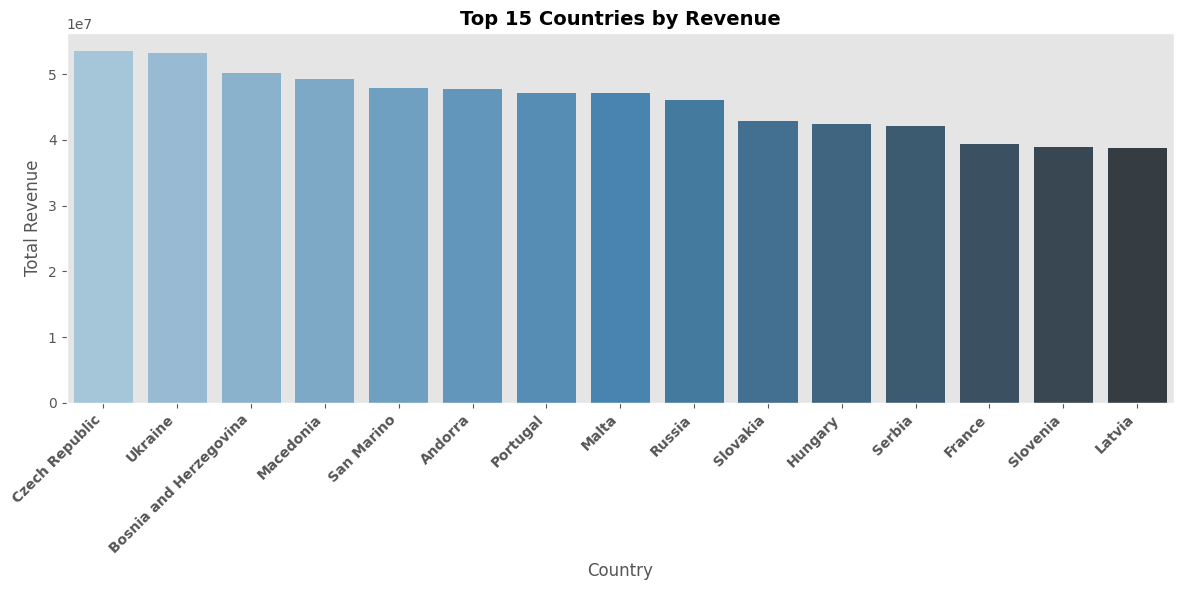

In [ ]:
top_fifteen_countries_revenue = df.groupby("name")["revenue"].sum().sort_values(ascending=False).head(15).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=top_fifteen_countries_revenue, x="name", y="revenue", palette="Blues_d")

plt.title("Top 15 Countries by Revenue", fontsize=14, weight='bold')
plt.xlabel("Country")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45, ha='right', fontweight='bold')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

<ipython-input-29-336645f89b46>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_fifteen_countries_profit, x="name", y="profit", palette="Blues_d")


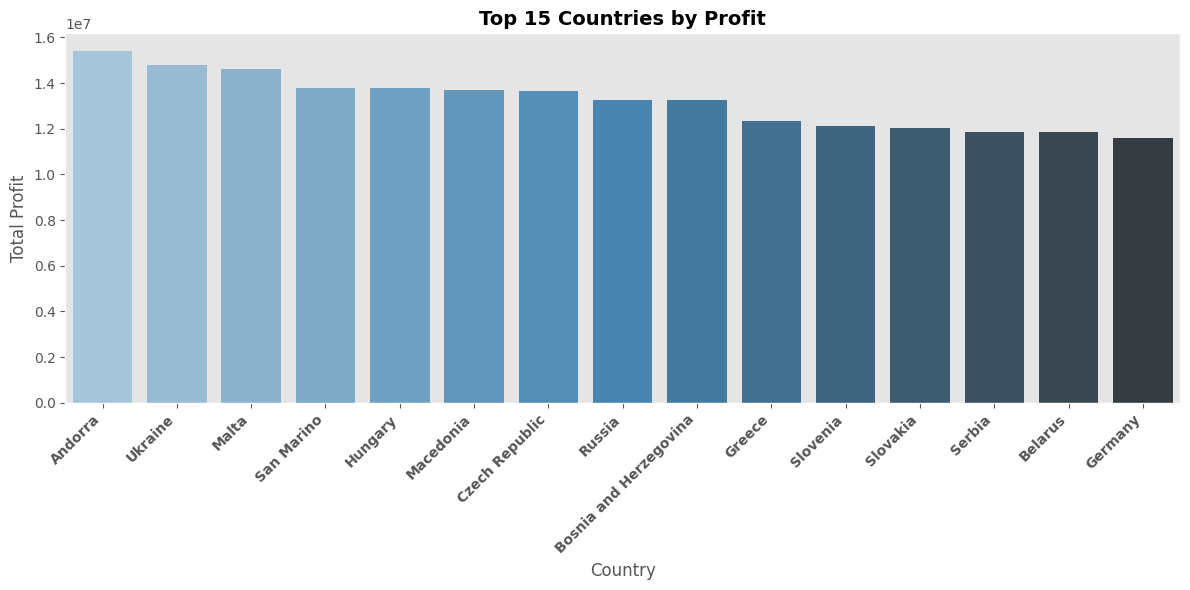

In [ ]:
top_fifteen_countries_profit = df.groupby("name")["profit"].sum().sort_values(ascending=False).head(15).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=top_fifteen_countries_profit, x="name", y="profit", palette="Blues_d")

plt.title("Top 15 Countries by Profit", fontsize=14, weight='bold')
plt.xlabel("Country")
plt.ylabel("Total Profit")
plt.xticks(rotation=45, ha='right', fontweight='bold')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

<ipython-input-30-81e87b25a805>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_fifteen_countries_cost, x="name", y="cost", palette="Blues_d")


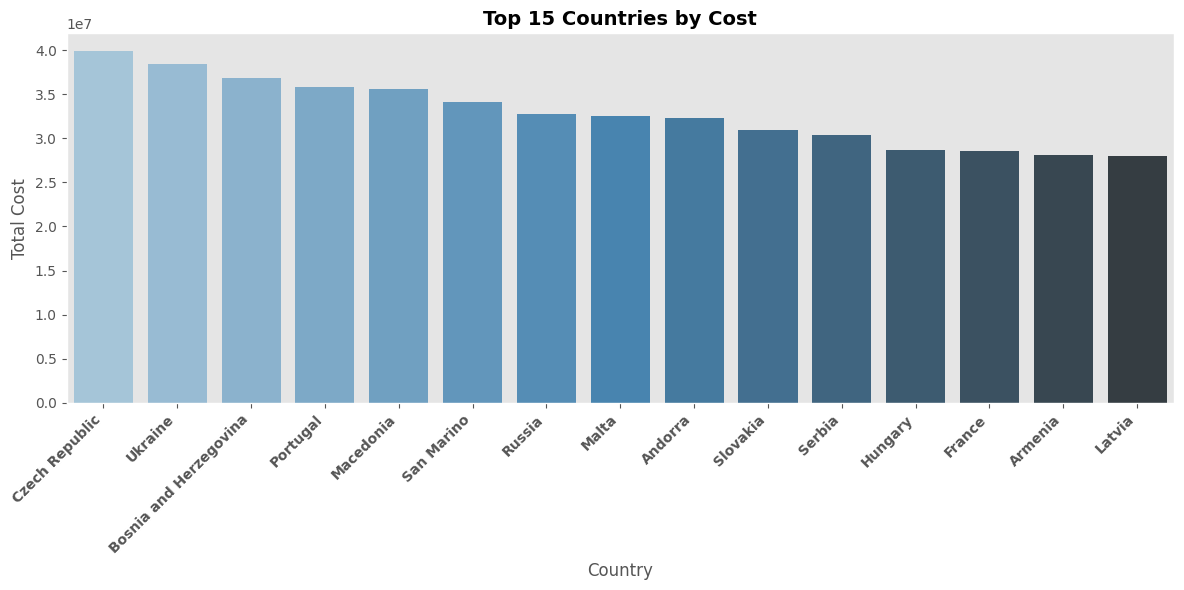

In [ ]:
top_fifteen_countries_cost = df.groupby("name")["cost"].sum().sort_values(ascending=False).head(15).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=top_fifteen_countries_cost, x="name", y="cost", palette="Blues_d")

plt.title("Top 15 Countries by Cost", fontsize=14, weight='bold')
plt.xlabel("Country")
plt.ylabel("Total Cost")
plt.xticks(rotation=45, ha='right', fontweight='bold')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

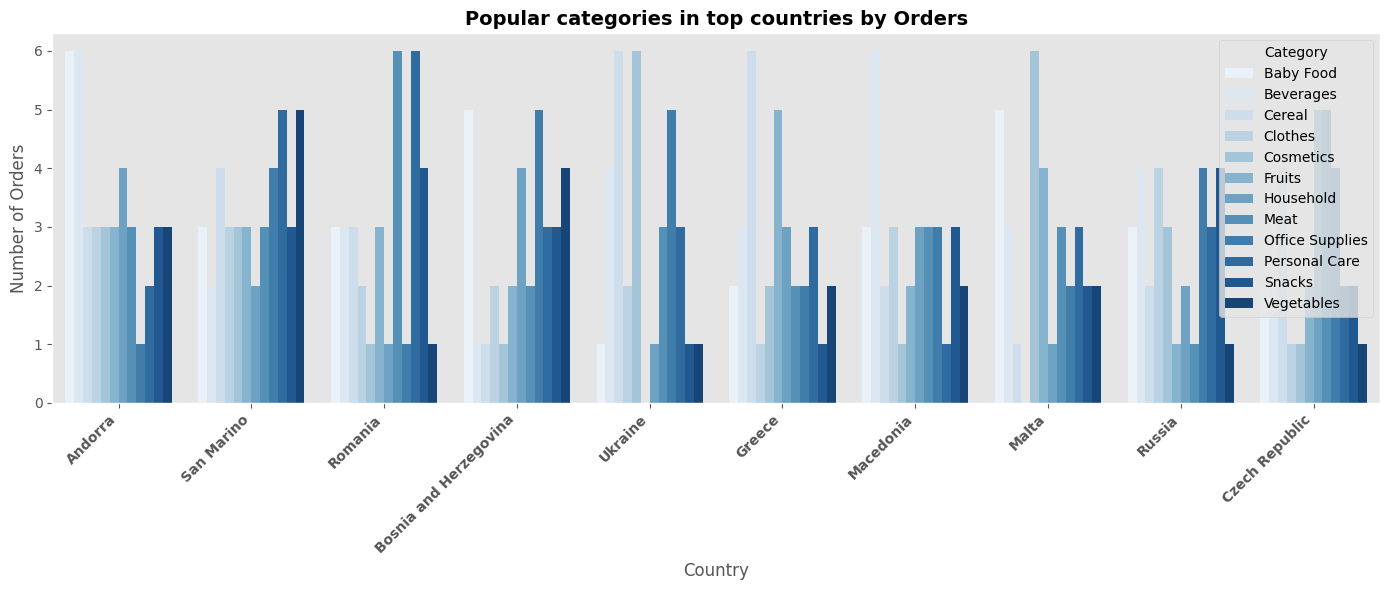

In [ ]:
top_countries = df.groupby("name")["order_id"].count().sort_values(ascending=False).head(10)
top_country_names = top_countries.index


filtered_df = df[df["name"].isin(top_country_names)]

category_counts = (filtered_df.groupby(["name", "category"])["order_id"].count().reset_index(name="order_count"))
category_counts["name"] = pd.Categorical(category_counts["name"],categories=top_country_names,ordered=True)


plt.figure(figsize=(14, 6))
sns.barplot(data=category_counts,x="name",y="order_count",hue="category",palette="Blues")

plt.title("Popular categories in top countries by Orders", fontsize=14, weight='bold')
plt.xlabel("Country")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45, ha='right', fontweight='bold')
plt.legend(title="Category")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

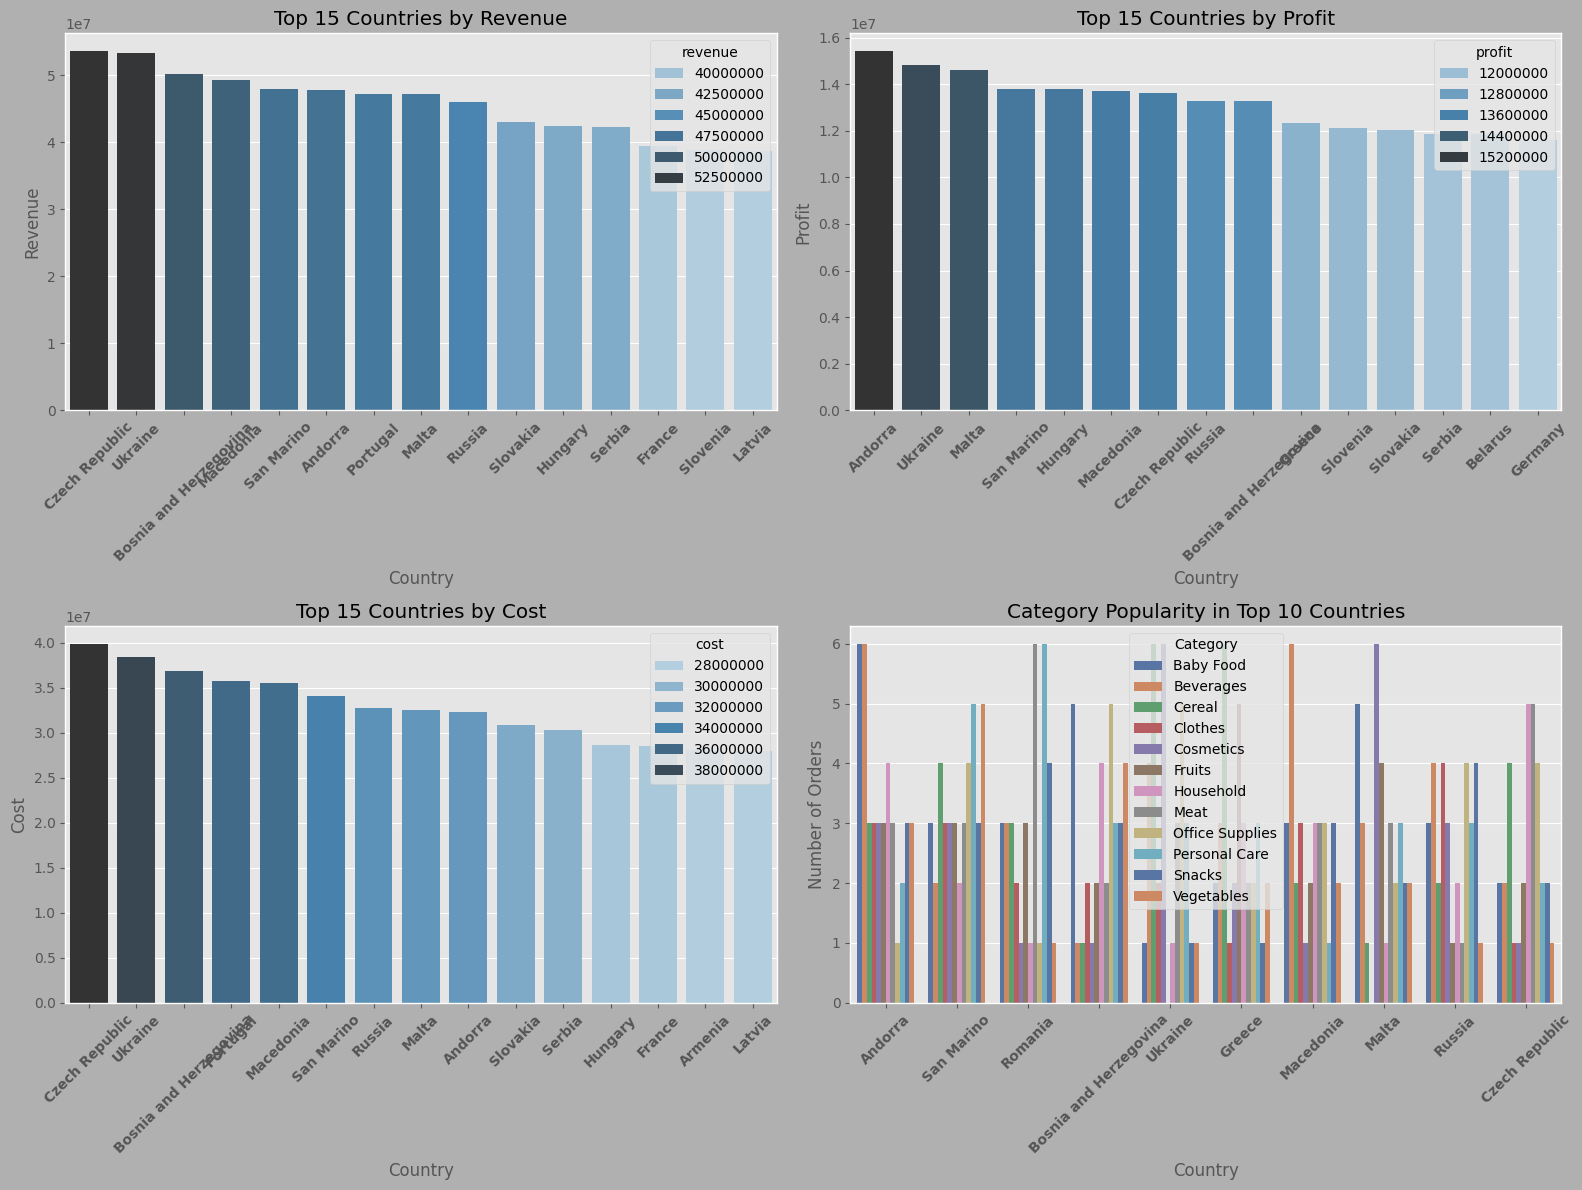

In [ ]:
plt.style.use("ggplot")
fig, ax = plt.subplots(2, 2, figsize=(16, 12))
fig.patch.set_facecolor("#b0b0b0")


sns.barplot(data=top_fifteen_countries_revenue, x="name", y="revenue", ax=ax[0, 0], palette="Blues_d", hue="revenue")
ax[0, 0].set_xlabel("Country")
ax[0, 0].set_ylabel("Revenue")
ax[0, 0].set_title("Top 15 Countries by Revenue")
ax[0, 0].tick_params(axis='x', rotation=45)
for tick in ax[0, 0].get_xticklabels():
    tick.set_fontweight('bold')


sns.barplot(data=top_fifteen_countries_profit, x="name", y="profit", ax=ax[0, 1], palette="Blues_d", hue="profit")
ax[0, 1].set_xlabel("Country")
ax[0, 1].set_ylabel("Profit")
ax[0, 1].set_title("Top 15 Countries by Profit")
ax[0, 1].tick_params(axis='x', rotation=45)
for tick in ax[0, 1].get_xticklabels():
    tick.set_fontweight('bold')


sns.barplot(data=top_fifteen_countries_cost, x="name", y="cost", ax=ax[1, 0], palette="Blues_d", hue="cost")
ax[1, 0].set_xlabel("Country")
ax[1, 0].set_ylabel("Cost")
ax[1, 0].set_title("Top 15 Countries by Cost")
ax[1, 0].tick_params(axis='x', rotation=45)
for tick in ax[1, 0].get_xticklabels():
    tick.set_fontweight('bold')


top_countries = df.groupby("name")["order_id"].count().sort_values(ascending=False).head(10)
top_country_names = top_countries.index
filtered_df = df[df["name"].isin(top_country_names)]

category_counts = (filtered_df.groupby(["name", "category"])["order_id"].count().reset_index(name="order_count"))


category_counts["name"] = pd.Categorical(category_counts["name"],categories=top_country_names,ordered=True)

sns.barplot(data=category_counts,x="name",y="order_count",hue="category",palette="deep",ax=ax[1, 1])


ax[1, 1].set_xlabel("Country")
ax[1, 1].set_ylabel("Number of Orders")
ax[1, 1].set_title("Category Popularity in Top 10 Countries")
ax[1, 1].tick_params(axis='x', rotation=45)


for tick in ax[1, 1].get_xticklabels():
    tick.set_fontweight('bold')

ax[1, 1].legend(title="Category")

plt.tight_layout()
plt.show()


Since the dataset includes a fairly large number of countries, let's analyze the top 15 countries based on order count. From the graph, we can see that the highest number of orders come from Andorra, San Marino, and Romania. However, this does not directly correlate with revenue. In terms of revenue, the Czech Republic leads, followed by Ukraine and Bosnia and Herzegovina. When looking at profit, the top countries are Andorra, Ukraine, and Malta. As for total cost, the Czech Republic, Ukraine, and Bosnia and Herzegovina are at the top.We can see that Czech Republic and Bosnia and Herzegovina have relatively high revenue, they also incur significant costs, which is reflected in the profit graph. Additionally, we can observe which product categories are in demand in the countries with the highest number of orders.

<ipython-input-38-110b530671d3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, y="region", x="revenue", palette="Blues_d",estimator="sum")


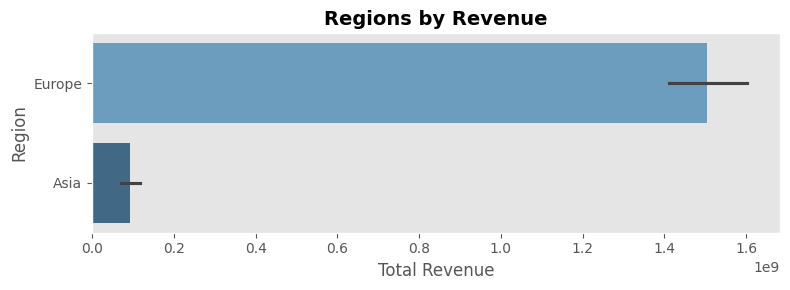

In [ ]:
plt.figure(figsize=(8, 3))
sns.barplot(data=df, y="region", x="revenue", palette="Blues_d",estimator="sum")

plt.title("Regions by Revenue", fontsize=14, weight='bold')
plt.xlabel("Total Revenue")
plt.ylabel("Region")
plt.grid(axis='x')
plt.tight_layout()
plt.show()

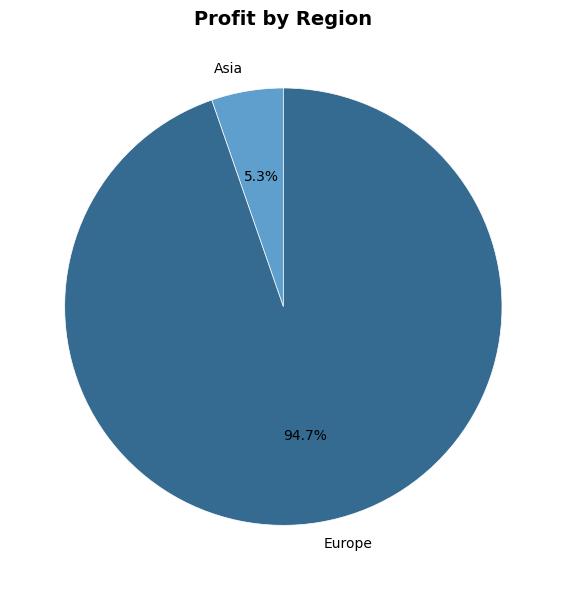

In [ ]:
region_profit = df.groupby("region")["profit"].sum().reset_index()


plt.figure(figsize=(6, 6))
plt.pie(region_profit["profit"],labels=region_profit["region"],autopct="%1.1f%%",startangle=90,colors=sns.color_palette("Blues_d", n_colors=len(region_profit)), wedgeprops={"edgecolor": "white"})

plt.title("Profit by Region", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

<ipython-input-49-acd5fe649d35>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, y="region", x="cost", palette="Blues_d",estimator="sum")


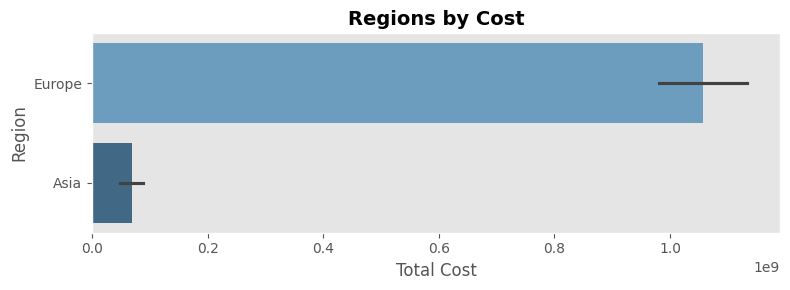

In [ ]:
plt.figure(figsize=(8, 3))
sns.barplot(data=df, y="region", x="cost", palette="Blues_d",estimator="sum")

plt.title("Regions by Cost", fontsize=14, weight='bold')
plt.xlabel("Total Cost")
plt.ylabel("Region")
plt.grid(axis='x')
plt.tight_layout()
plt.show()

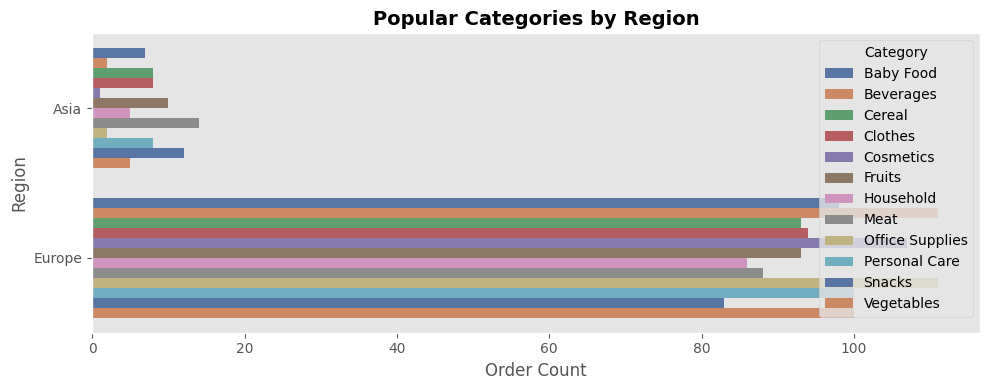

In [ ]:

region_category_orders = (df.groupby(["region", "category"])["order_id"].count().reset_index(name="order_count"))


region_order = region_category_orders.groupby("region")["order_count"].sum().sort_values().index

plt.figure(figsize=(10, 4))
ax = sns.barplot(data=region_category_orders,y="region",x="order_count",hue="category",order=region_order,palette="deep")

plt.title("Popular Categories by Region", fontsize=14, weight='bold')
plt.xlabel("Order Count")
plt.ylabel("Region")
plt.grid(axis='x')
plt.legend(title="Category")
plt.tight_layout()
plt.show()

<ipython-input-88-38766f88cdc1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, y="region", x="revenue", palette="Blues_d", estimator="sum", ax=axs[0, 0])
<ipython-input-88-38766f88cdc1>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, y="region", x="cost", palette="Blues_d", estimator="sum", ax=axs[1, 0])


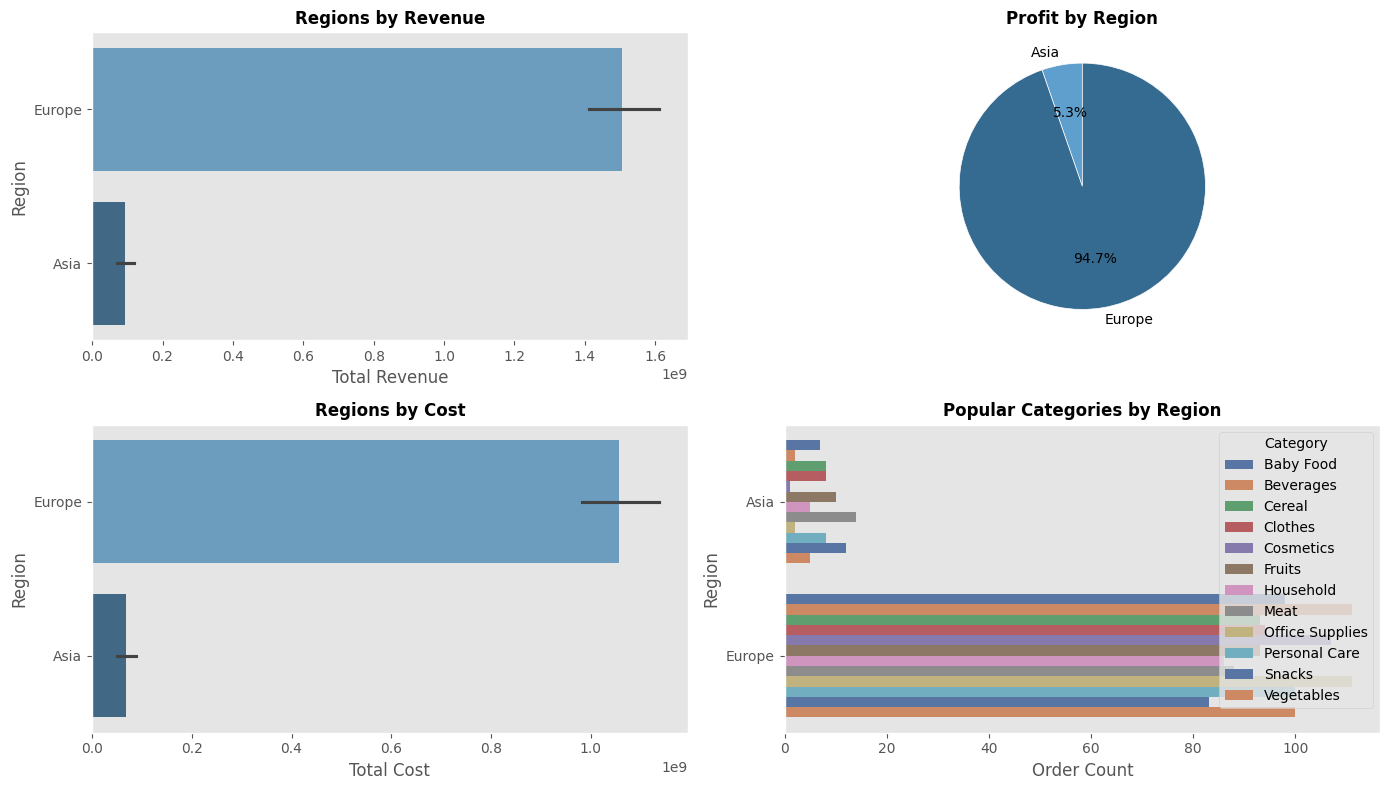

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(14, 8))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

sns.barplot(data=df, y="region", x="revenue", palette="Blues_d", estimator="sum", ax=axs[0, 0])
axs[0, 0].set_title("Regions by Revenue", fontsize=12, weight='bold')
axs[0, 0].set_xlabel("Total Revenue")
axs[0, 0].set_ylabel("Region")
axs[0, 0].grid(axis='x')


region_profit = df.groupby("region")["profit"].sum().reset_index()
axs[0, 1].pie(region_profit["profit"],labels=region_profit["region"],autopct="%1.1f%%",startangle=90,colors=sns.color_palette("Blues_d", n_colors=len(region_profit)),wedgeprops={"edgecolor": "white"})
axs[0, 1].set_title("Profit by Region", fontsize=12, weight='bold')

sns.barplot(data=df, y="region", x="cost", palette="Blues_d", estimator="sum", ax=axs[1, 0])
axs[1, 0].set_title("Regions by Cost", fontsize=12, weight='bold')
axs[1, 0].set_xlabel("Total Cost")
axs[1, 0].set_ylabel("Region")
axs[1, 0].grid(axis='x')


region_category_orders = (df.groupby(["region", "category"])["order_id"].count().reset_index(name="order_count"))
region_order = region_category_orders.groupby("region")["order_count"].sum().sort_values().index

sns.barplot(data=region_category_orders,y="region",x="order_count",hue="category",order=region_order,palette="deep",ax=axs[1, 1])
axs[1, 1].set_title("Popular Categories by Region", fontsize=12, weight='bold')
axs[1, 1].set_xlabel("Order Count")
axs[1, 1].set_ylabel("Region")
axs[1, 1].grid(axis='x')
axs[1, 1].legend(title="Category", loc="best")

plt.tight_layout()
plt.show()


In terms of region, the picture is clear: Europe significantly outperforms all other regions across all indicators. Additionally, we can observe which categories are more or less popular in Europe and Asia.

<ipython-input-100-df5910249258>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


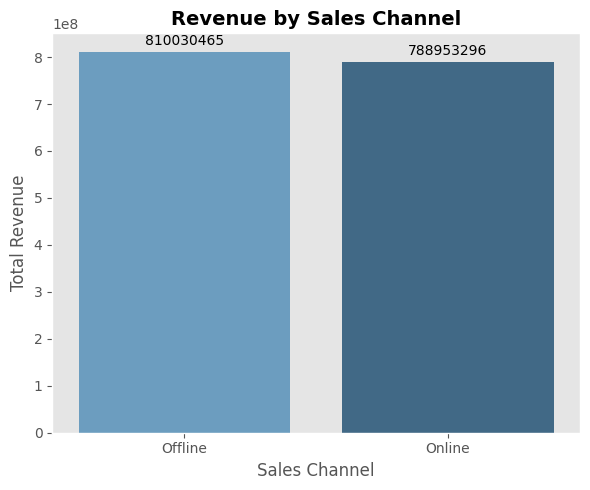

In [ ]:
df["sales_channel"] = df["sales_channel"].str.title()


channel_revenue = df.groupby("sales_channel")["revenue"].sum().reset_index()


plt.figure(figsize=(6, 5))
ax = sns.barplot(data=channel_revenue,x="sales_channel",y="revenue",palette="Blues_d")

for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", padding=3)

plt.title("Revenue by Sales Channel", fontsize=14, weight='bold')
plt.xlabel("Sales Channel")
plt.ylabel("Total Revenue")
plt.grid(axis="y")
plt.tight_layout()
plt.show()

<ipython-input-95-b8eef5576f2a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


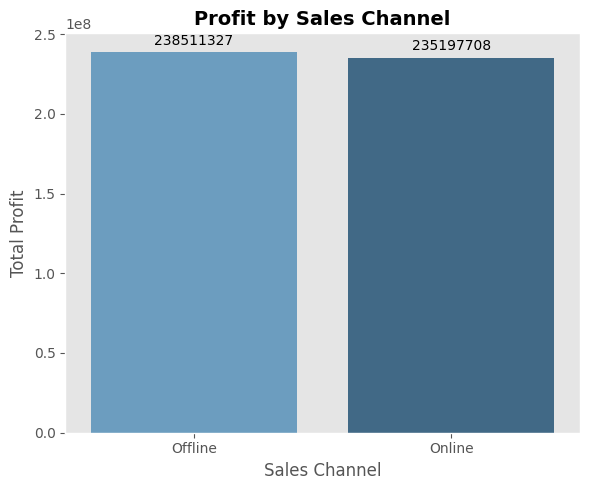

In [ ]:

channel_revenue = df.groupby("sales_channel")["profit"].sum().reset_index()

plt.figure(figsize=(6, 5))
ax = sns.barplot(data=channel_revenue,x="sales_channel",y="profit",palette="Blues_d")

for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", padding=3)

plt.title("Profit by Sales Channel", fontsize=14, weight='bold')
plt.xlabel("Sales Channel")
plt.ylabel("Total Profit")
plt.grid(axis="y")
plt.tight_layout()
plt.show()

<ipython-input-96-5bffe9cea2ec>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


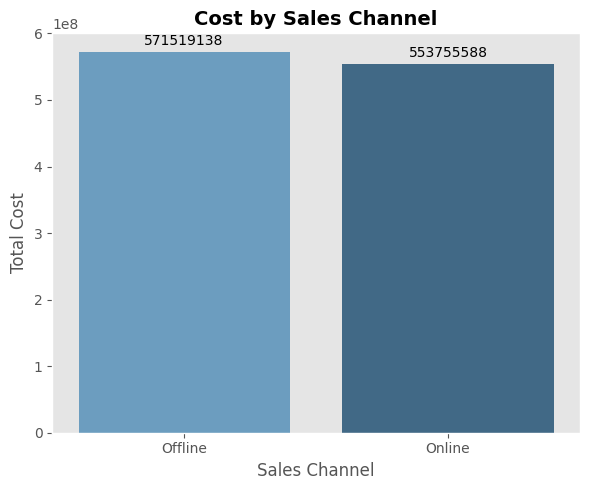

In [ ]:
channel_revenue = df.groupby("sales_channel")["cost"].sum().reset_index()

plt.figure(figsize=(6, 5))
ax = sns.barplot(data=channel_revenue,x="sales_channel",y="cost",palette="Blues_d")
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", padding=3)
plt.title("Cost by Sales Channel", fontsize=14, weight='bold')
plt.xlabel("Sales Channel")
plt.ylabel("Total Cost")
plt.grid(axis="y")
plt.tight_layout()
plt.show()

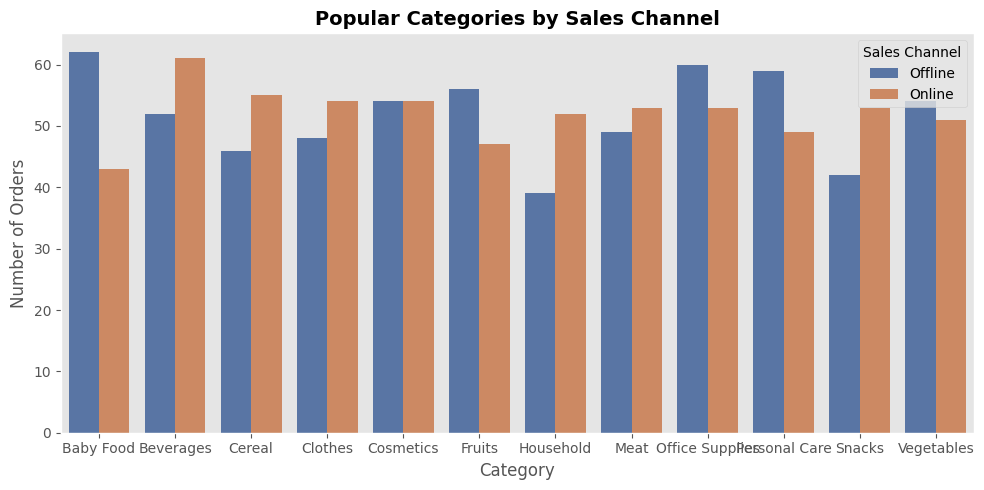

In [ ]:
channel_popularity = df.groupby(["sales_channel","category"])["order_id"].count().reset_index()


plt.figure(figsize=(10, 5))
ax = sns.barplot(data=channel_popularity,x="category",y="order_id",hue="sales_channel",palette="deep"
)

plt.title("Popular Categories by Sales Channel", fontsize=14, weight='bold')
plt.xlabel("Category")
plt.ylabel("Number of Orders")
plt.grid(axis='y')
plt.legend(title="Sales Channel")
plt.tight_layout()
plt.show()

<ipython-input-101-d487267b5b9f>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=revenue_by_channel, x="sales_channel", y="revenue", palette="Blues_d", ax=axs[0, 0])
<ipython-input-101-d487267b5b9f>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=profit_by_channel, x="sales_channel", y="profit", palette="Blues_d", ax=axs[0, 1])
<ipython-input-101-d487267b5b9f>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cost_by_channel, x="sales_channel", y="cost", palette="Blues_d", ax=axs[1, 0])


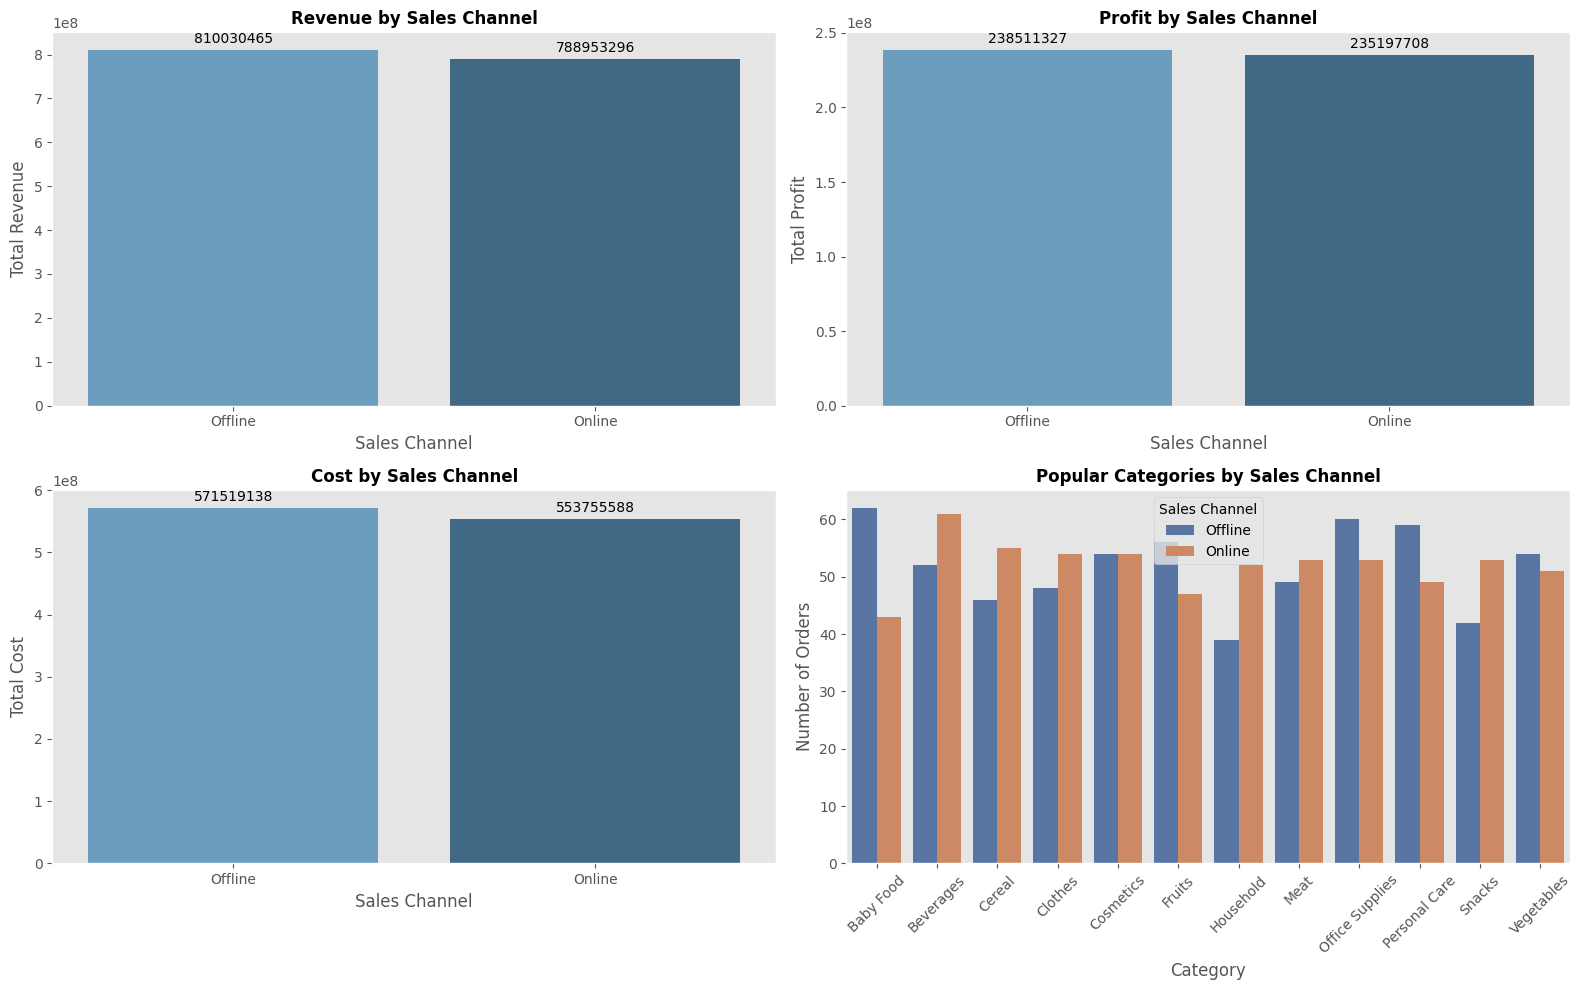

In [ ]:
df["sales_channel"] = df["sales_channel"].str.title()

revenue_by_channel = df.groupby("sales_channel")["revenue"].sum().reset_index()
profit_by_channel = df.groupby("sales_channel")["profit"].sum().reset_index()
cost_by_channel = df.groupby("sales_channel")["cost"].sum().reset_index()
channel_popularity = df.groupby(["sales_channel", "category"])["order_id"].count().reset_index()

fig, axs = plt.subplots(2, 2, figsize=(16, 10))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

sns.barplot(data=revenue_by_channel, x="sales_channel", y="revenue", palette="Blues_d", ax=axs[0, 0])
axs[0, 0].set_title("Revenue by Sales Channel", fontsize=12, weight='bold')
axs[0, 0].set_xlabel("Sales Channel")
axs[0, 0].set_ylabel("Total Revenue")
axs[0, 0].grid(axis='y')
for container in axs[0, 0].containers:
    axs[0, 0].bar_label(container, fmt="%.0f", padding=3)

sns.barplot(data=profit_by_channel, x="sales_channel", y="profit", palette="Blues_d", ax=axs[0, 1])
axs[0, 1].set_title("Profit by Sales Channel", fontsize=12, weight='bold')
axs[0, 1].set_xlabel("Sales Channel")
axs[0, 1].set_ylabel("Total Profit")
axs[0, 1].grid(axis='y')
for container in axs[0, 1].containers:
    axs[0, 1].bar_label(container, fmt="%.0f", padding=3)


sns.barplot(data=cost_by_channel, x="sales_channel", y="cost", palette="Blues_d", ax=axs[1, 0])
axs[1, 0].set_title("Cost by Sales Channel", fontsize=12, weight='bold')
axs[1, 0].set_xlabel("Sales Channel")
axs[1, 0].set_ylabel("Total Cost")
axs[1, 0].grid(axis='y')
for container in axs[1, 0].containers:
    axs[1, 0].bar_label(container, fmt="%.0f", padding=3)


sns.barplot(data=channel_popularity, x="category", y="order_id", hue="sales_channel", palette="deep", ax=axs[1, 1])
axs[1, 1].set_title("Popular Categories by Sales Channel", fontsize=12, weight='bold')
axs[1, 1].set_xlabel("Category")
axs[1, 1].set_ylabel("Number of Orders")
axs[1, 1].tick_params(axis='x', rotation=45)
axs[1, 1].grid(axis='y')
axs[1, 1].legend(title="Sales Channel")

plt.tight_layout()
plt.show()

Approximately the same number of orders are placed online and offline. A similar trend can be observed across other indicators as well. Additionally, we can analyze the statistics by category to see which products are purchased more frequently online and which ones offline

In [ ]:
df.head()

,order_id,order_date,ship_date,order_priority,country_code,product_id,sales_channel,units_sold,unit_price,unit_cost,name,region,sub-region,category,profit,revenue,cost
0,100640618,10/8/2014,10/18/2014,M,NOR,2103,Online,650.0,205.70,117.11,Norway,Europe,Northern Europe,Cereal,57583.50,133705.00,76121.50
1,100983083,8/11/2016,8/11/2016,C,SRB,2103,Offline,1993.0,205.70,117.11,Serbia,Europe,Southern Europe,Cereal,176559.87,409960.10,233400.23
2,102230632,5/13/2017,6/13/2017,L,MNE,2455,Online,1171.0,109.28,35.84,Montenegro,Europe,Southern Europe,Clothes,85998.24,127966.88,41968.64
3,103435266,8/11/2012,9/18/2012,H,SRB,1270,Offline,7648.0,47.45,31.79,Serbia,Europe,Southern Europe,Beverages,119767.68,362897.60,243129.92
4,103450715,3/15/2015,4/18/2015,H,SVK,8681,Online,2220.0,651.21,524.96,Slovakia,Europe,Eastern Europe,Office Supplies,280275.00,1445686.20,1165411.20


In [ ]:
df["order_date"] = pd.to_datetime(df["order_date"])
df["ship_date"] = pd.to_datetime(df["ship_date"])

df["delivery_days"] = (df["ship_date"] - df["order_date"]).dt.days
df.head()


,order_id,order_date,ship_date,order_priority,country_code,product_id,sales_channel,units_sold,unit_price,unit_cost,name,region,sub-region,category,profit,revenue,cost,delivery_days
0,100640618,2014-10-08,2014-10-18,M,NOR,2103,Online,650.0,205.70,117.11,Norway,Europe,Northern Europe,Cereal,57583.50,133705.00,76121.50,10
1,100983083,2016-08-11,2016-08-11,C,SRB,2103,Offline,1993.0,205.70,117.11,Serbia,Europe,Southern Europe,Cereal,176559.87,409960.10,233400.23,0
2,102230632,2017-05-13,2017-06-13,L,MNE,2455,Online,1171.0,109.28,35.84,Montenegro,Europe,Southern Europe,Clothes,85998.24,127966.88,41968.64,31
3,103435266,2012-08-11,2012-09-18,H,SRB,1270,Offline,7648.0,47.45,31.79,Serbia,Europe,Southern Europe,Beverages,119767.68,362897.60,243129.92,38
4,103450715,2015-03-15,2015-04-18,H,SVK,8681,Online,2220.0,651.21,524.96,Slovakia,Europe,Eastern Europe,Office Supplies,280275.00,1445686.20,1165411.20,34


Text(0.5, 1.0, 'Average Delivery by Category')

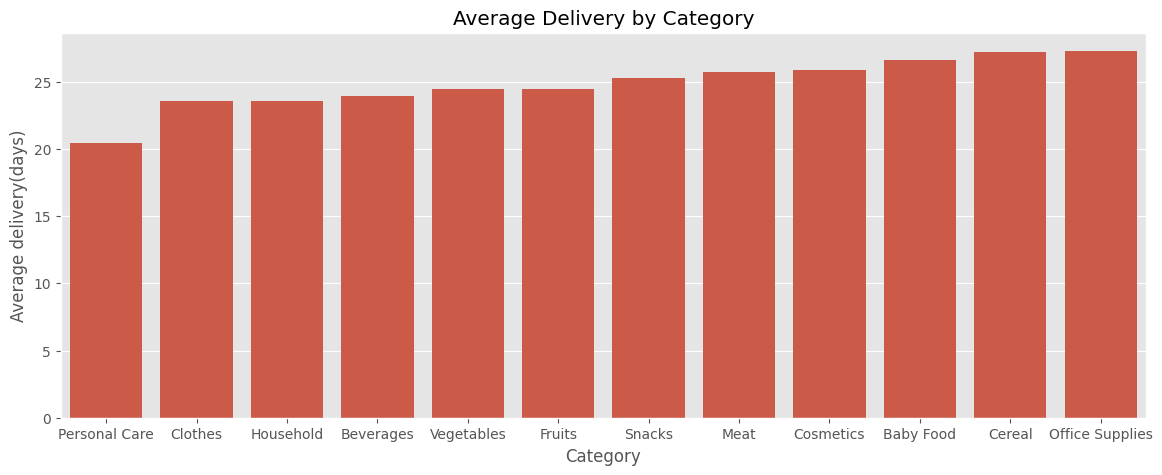

In [ ]:
plt.style.use("ggplot")
average_delivery_days = df.groupby("category")["delivery_days"].mean().sort_values().reset_index()
plt.figure(figsize=(14, 5))
sns.barplot(data=average_delivery_days, x="category", y="delivery_days")

plt.xlabel("Category")
plt.ylabel("Average delivery(days)")
plt.title("Average Delivery by Category")




Text(0.5, 1.0, 'Fastest average delivery by Country')

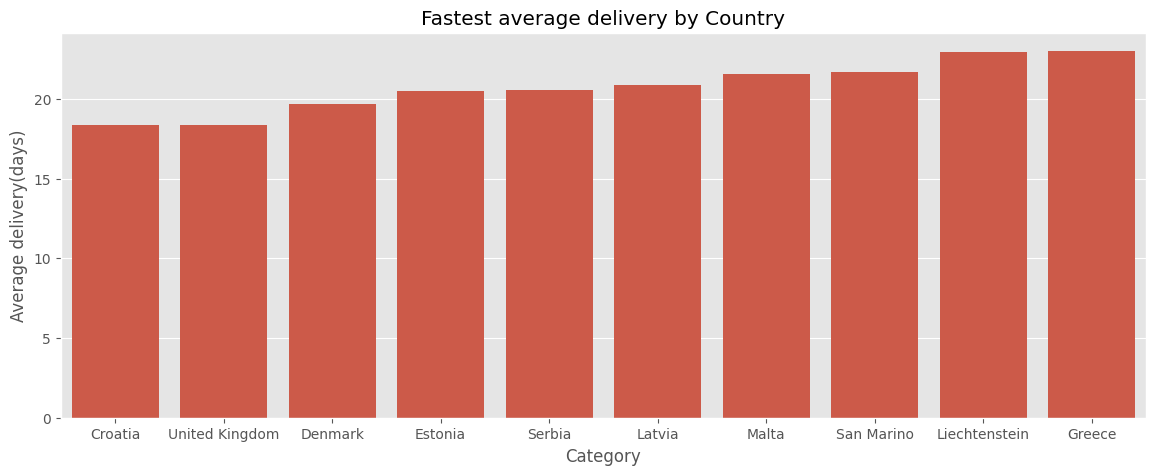

In [ ]:
plt.style.use("ggplot")
average_delivery_days = df.groupby("name")["delivery_days"].mean().sort_values().reset_index().head(10)
plt.figure(figsize=(14, 5))
sns.barplot(data=average_delivery_days, x="name", y="delivery_days")

plt.xlabel("Category")
plt.ylabel("Average delivery(days)")
plt.title("Fastest average delivery by Country")

Text(0.5, 1.0, 'Fastest average delivery by Region')

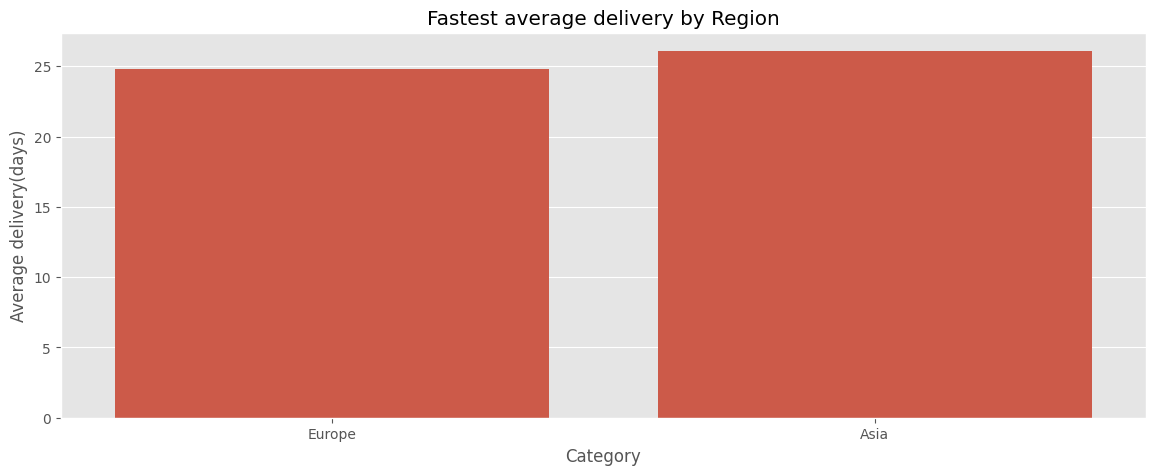

In [ ]:
plt.style.use("ggplot")
average_delivery_days = df.groupby("region")["delivery_days"].mean().sort_values().reset_index()
plt.figure(figsize=(14, 5))
sns.barplot(data=average_delivery_days, x="region", y="delivery_days")

plt.xlabel("Category")
plt.ylabel("Average delivery(days)")
plt.title("Fastest average delivery by Region")

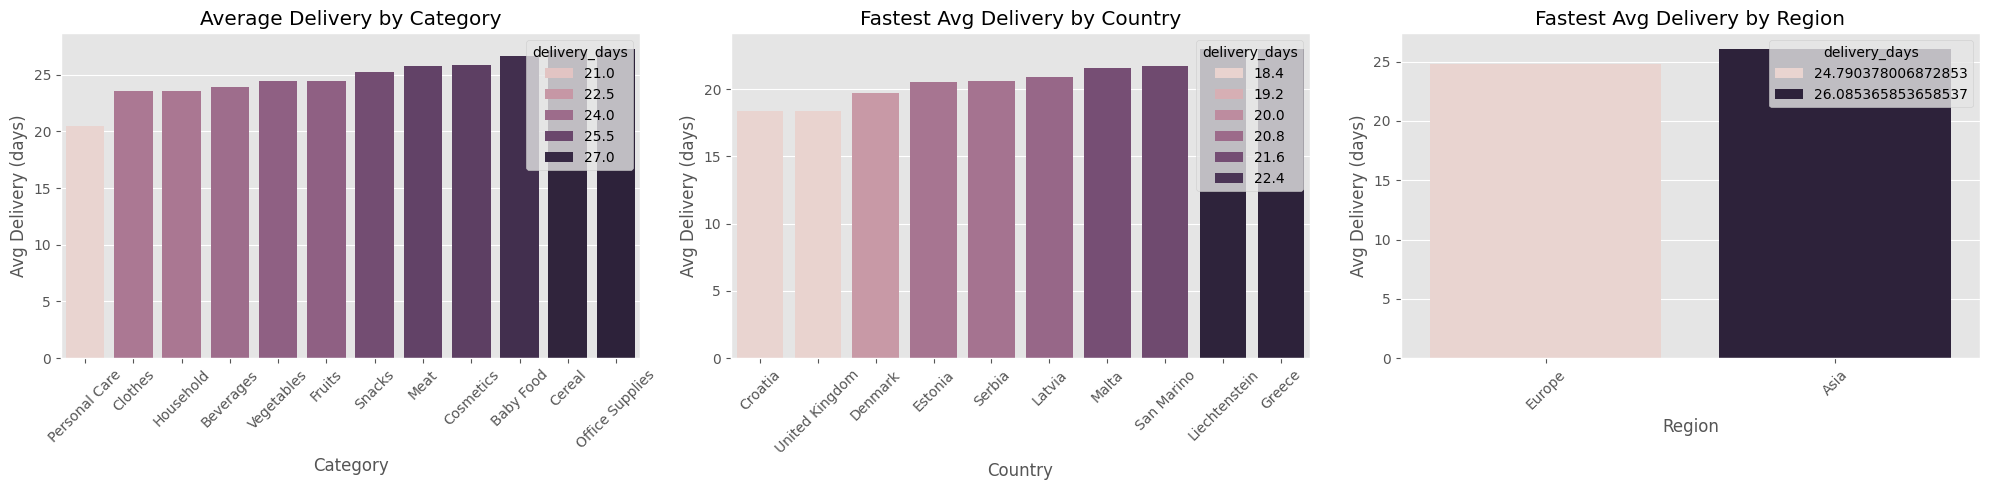

In [ ]:
plt.style.use("ggplot")

avg_by_category = df.groupby("category")["delivery_days"].mean().sort_values().reset_index()
avg_by_country = df.groupby("name")["delivery_days"].mean().sort_values().reset_index().head(10)
avg_by_region = df.groupby("region")["delivery_days"].mean().sort_values().reset_index()

fig, axs = plt.subplots(1, 3, figsize=(20, 5))
plt.subplots_adjust(wspace=0.4)


sns.barplot(data=avg_by_category, x="category", y="delivery_days", ax=axs[0],hue="delivery_days")
axs[0].set_title("Average Delivery by Category")
axs[0].set_xlabel("Category")
axs[0].set_ylabel("Avg Delivery (days)")
axs[0].tick_params(axis='x', rotation=45)


sns.barplot(data=avg_by_country, x="name", y="delivery_days", ax=axs[1],hue="delivery_days")
axs[1].set_title("Fastest Avg Delivery by Country")
axs[1].set_xlabel("Country")
axs[1].set_ylabel("Avg Delivery (days)")
axs[1].tick_params(axis='x', rotation=45)


sns.barplot(data=avg_by_region, x="region", y="delivery_days", ax=axs[2],hue="delivery_days")
axs[2].set_title("Fastest Avg Delivery by Region")
axs[2].set_xlabel("Region")
axs[2].set_ylabel("Avg Delivery (days)")
axs[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Personal Care products have the fastest average delivery time (21 days), while Office Supplies have the longest (27 days). The fastest delivery is to Croatia, United Kingdom and Denmark. Delivery to Asia and Europe takes approximately the same number of days.

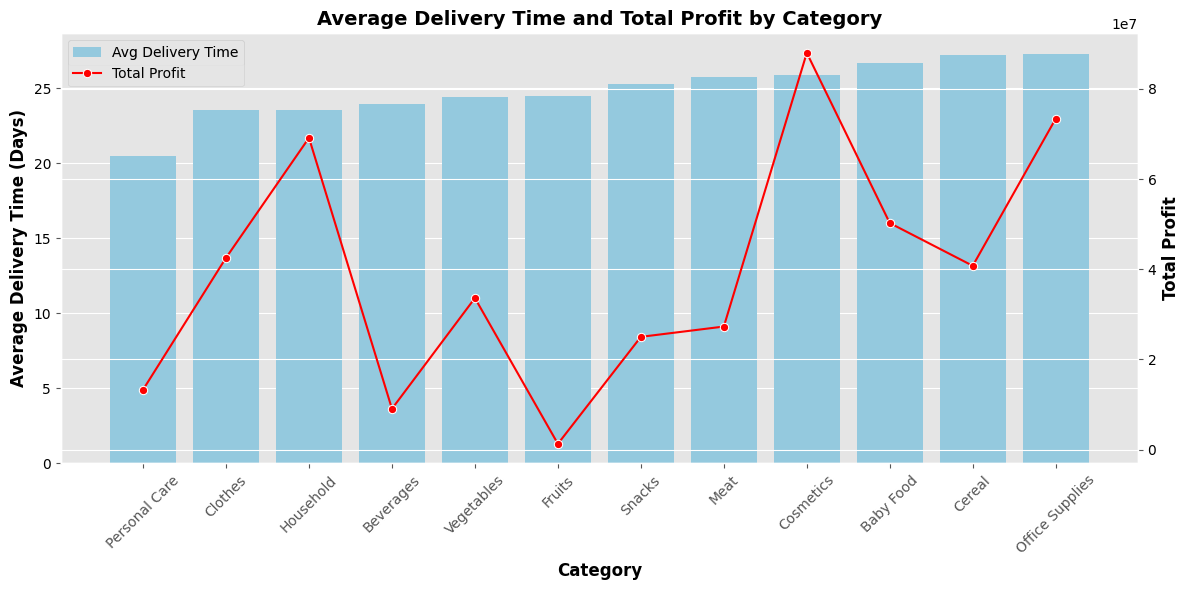

In [ ]:
avg_delivery = df.groupby("category")["delivery_days"].mean().sort_values()
total_profit = df.groupby("category")["profit"].sum()
data = pd.concat([avg_delivery, total_profit], axis=1).reset_index()

fig, ax1 = plt.subplots(figsize=(12, 6))
plt.title("Average Delivery Time and Total Profit by Category", fontsize=14, weight='bold')

sns.barplot(data=data, x="category", y="delivery_days", ax=ax1, color="skyblue", label="Avg Delivery Time")
ax1.set_ylabel("Average Delivery Time (Days)", color="black", weight='bold')
ax1.set_xlabel("Category", color="black", weight='bold')
ax1.tick_params(axis='y', labelcolor="black")
ax1.tick_params(axis='x', rotation=45)

ax2 = ax1.twinx()
sns.lineplot(data=data, x="category", y="profit", ax=ax2, color="red", marker="o", label="Total Profit")
ax2.set_ylabel("Total Profit", color="black", weight='bold')
ax2.tick_params(axis='y', labelcolor="black")

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax2.legend(h1 + h2, l1 + l2, loc='upper left')

plt.tight_layout()
plt.show()

From the Average Delivery Time and Total Profit by Category visualization, we can see that there is no correlation between delivery time and revenue.

In [ ]:
df["year"] = df["order_date"].dt.year


Text(0.5, 1.0, 'Units Sold/Year/Category')

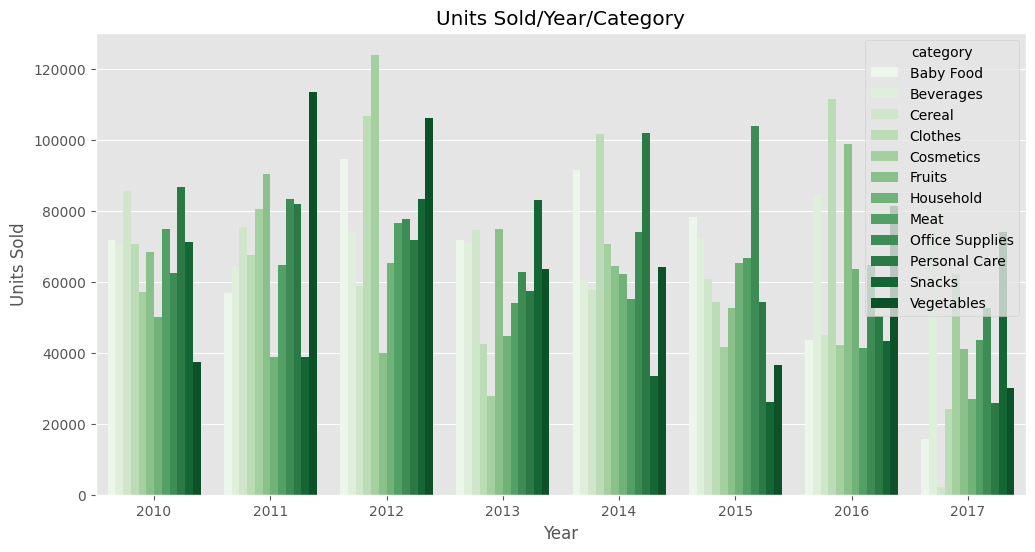

In [ ]:
sales_by_category_year = df.groupby(["year","category"])["units_sold"].sum().reset_index()
plt.figure(figsize=(12,6))
sns.barplot(data=sales_by_category_year, x="year", y="units_sold", hue="category", palette="Greens")

plt.xlabel("Year")
plt.ylabel("Units Sold")
plt.title("Units Sold/Year/Category")


The chart shows unit sales across various product categories from 2010 to 2017. The most notable peak occurred in 2012, when nearly all categories—especially Snacks, Baby Food, and Fruits—reached their highest sales levels. After this, there was a decline between 2013 and 2015, followed by a slight recovery in 2016 and a significant drop again in 2017.

Snacks and Fruits consistently performed well throughout the years, while categories like Vegetables, Clothes, and Cosmetics showed lower and more unstable sales. Meat and Baby Food had sharp fluctuations, indicating external influences or seasonal effects. The drop in 2017 suggests either a market change or incomplete data.

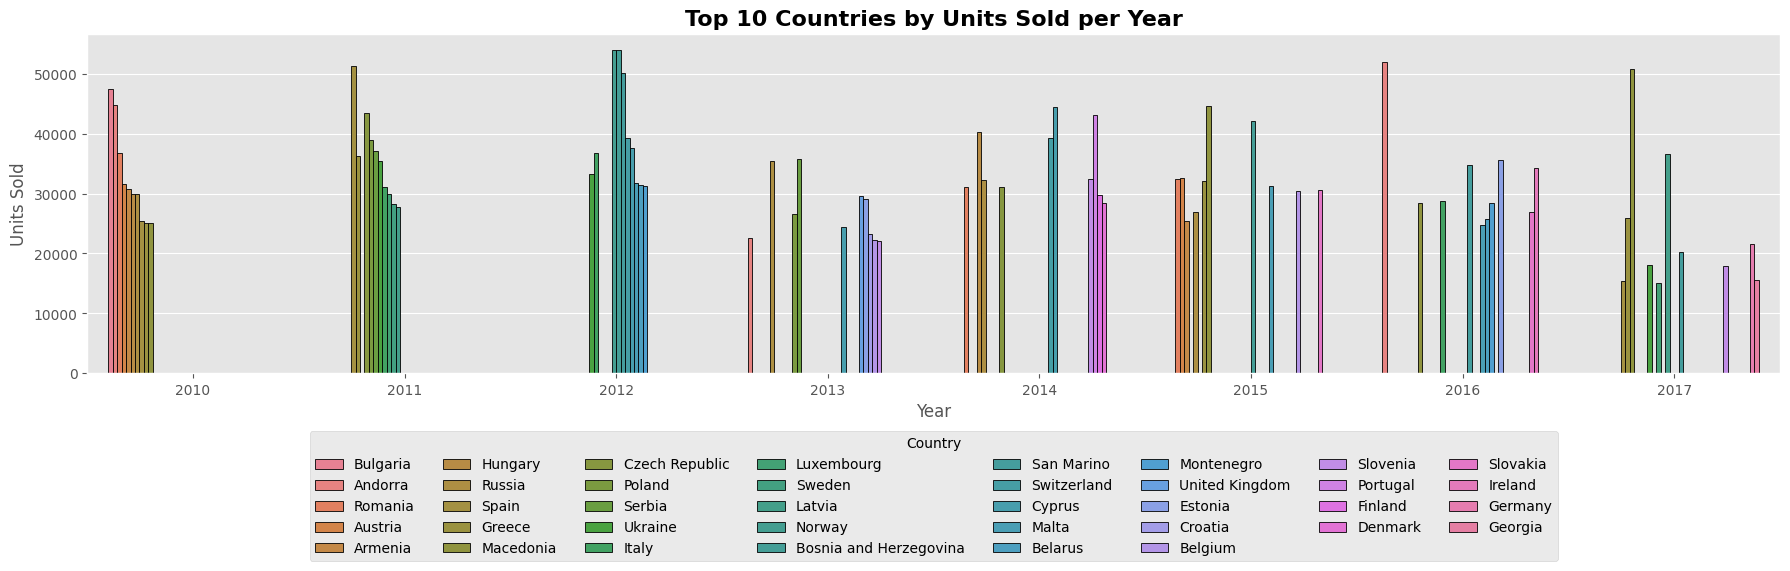

In [ ]:
grouped = df.groupby(["year", "name"])["units_sold"].sum().reset_index()
plt.figure(figsize=(18,6))
top10 = (grouped.sort_values(["year", "units_sold"], ascending=[True, False]).groupby("year").head(10))

sns.barplot(data=top10, x="year", y="units_sold", hue="name", dodge=True, edgecolor='black', linewidth=0.6)

plt.title("Top 10 Countries by Units Sold per Year", fontsize=16, weight='bold')
plt.xlabel("Year")
plt.ylabel("Units Sold")

plt.legend(
    title="Country",
    loc="upper center",
    bbox_to_anchor=(0.5, -0.15),
    ncol=8,
    frameon=True
)
plt.tight_layout()
plt.show()

The chart shows the top 10 countries by units sold each year from 2010 to 2017. The leading countries change from year to year, indicating shifting market dynamics. For example, Bulgaria led in 2010 and 2015, while Spain, Czech Republic, and Germany topped the chart in other years. Some smaller countries like San Marino and Malta also appear, suggesting strong localized sales

Text(0.5, 1.0, 'Units Sold/Year/Region')

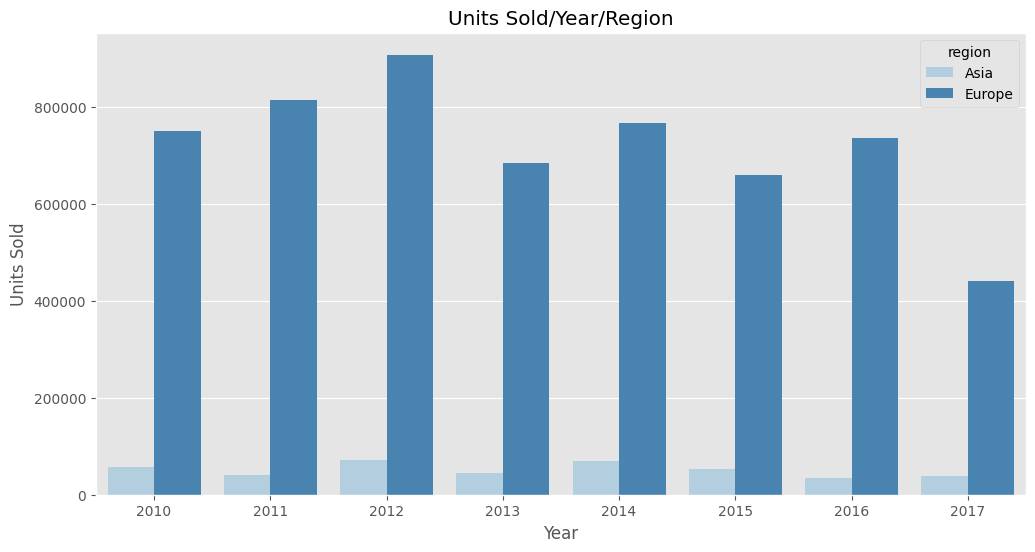

In [ ]:
sales_by_category_year = df.groupby(["year","region"])["units_sold"].sum().reset_index()
plt.figure(figsize=(12,6))
sns.barplot(data=sales_by_category_year, x="year", y="units_sold", hue="region", palette="Blues")

plt.xlabel("Year")
plt.ylabel("Units Sold")
plt.title("Units Sold/Year/Region")

Since the Europe region is much more popular in all aspects, we see a similar picture in sales. Much more goods are sold to Europe than to Asia every year, from 2010 to 2017

In [ ]:
df["order_weekday"] = df["order_date"].dt.day_name()


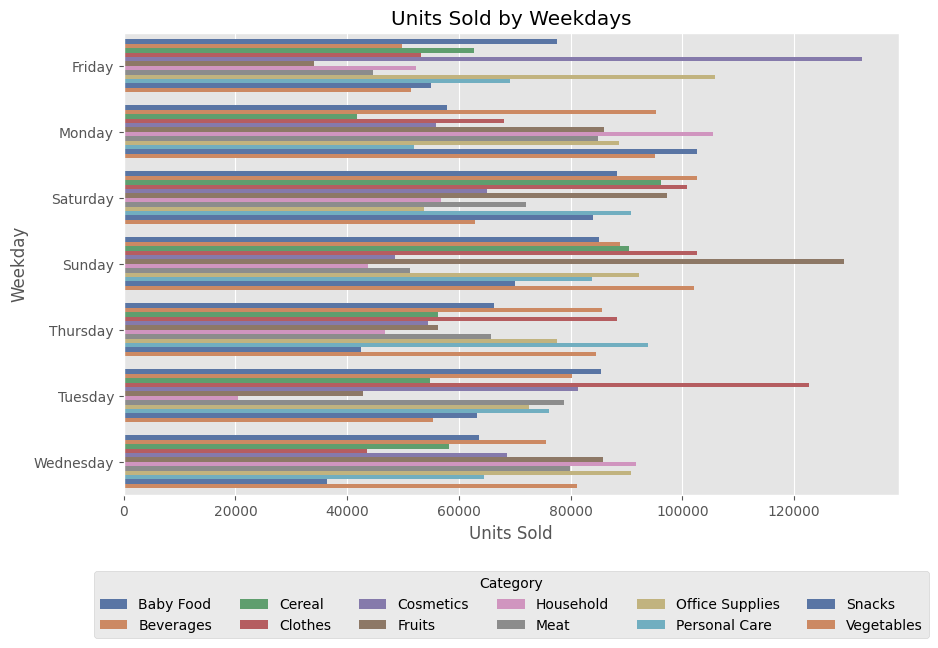

In [ ]:
units_sold_by_weekdays = df.groupby(["order_weekday", "category"])["units_sold"].sum().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data = units_sold_by_weekdays, y="order_weekday", x="units_sold",hue="category", palette="deep")

plt.xlabel("Units Sold")
plt.ylabel("Weekday")
plt.title("Units Sold by Weekdays")

plt.legend(
    title="Category",
    loc="upper center",
    bbox_to_anchor=(0.5, -0.15),
    ncol=6,
    frameon=True
)

Text(0.5, 1.0, 'Orders by Weekdays')

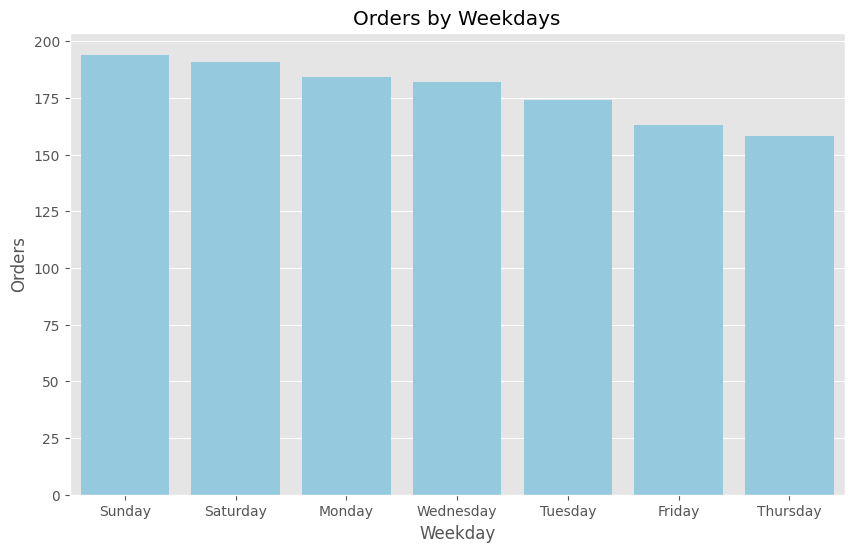

In [ ]:
plt.figure(figsize=(10,6))
units_sold_by_weekdays = df.groupby("order_weekday")["order_id"].size().reset_index(name="order_count").sort_values(by="order_count", ascending=False)
barplot = sns.barplot(data = units_sold_by_weekdays, x="order_weekday", y="order_count",color="skyblue")


plt.xlabel("Weekday")
plt.ylabel("Orders")
plt.title("Orders by Weekdays")


Units Sold by Weekdays reveals deeper insights by breaking down sales by product category.Tuesday stands out with a dramatic peak in Clothes sales. Friday sees the highest sales for Office Supplies, likely tied to business needs. Meanwhile, weekend sales (Saturday and Sunday) are dominated by categories like Fruits, Meat, and Beverages, reflecting typical grocery shopping behavior

Orders by Weekdays shows that the highest number of orders occurs on Sunday, followed closely by Saturday and Monday. This trend suggests that customers are most active during the weekend and at the start of the week, likely due to restocking household items or preparing for the week ahead. In contrast, Thursday and Friday see the lowest number of orders, indicating reduced shopping activity during the latter part of the workweek.